### Cross validation for logistic regression
Cross validation with sklearm for logistic regression on the Titanic dataset

***
#### Environment
`conda activate sklearn-env`

***
#### Goals
- Build a pipeline
- Use the pipeline to transform data
- Use the pipeline to predict
- Run cross validation on generated pipeline model and display default score metrics for each fold

***
#### References

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

https://scikit-learn.org/stable/modules/cross_validation.html



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

#### Dataset load from CSV located on UCI website.

http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data  
If the URL does not work the dataset can be loaded from the data folder `./data/auto-mpg.data`.

In [2]:
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/40945
raw_dataset = fetch_openml("titanic", version=1, as_frame=True).frame
dataset = raw_dataset.copy()
dataset.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,None,NaN,"Belfast, NI"
8,1.0,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,None,C,None,22.0,"Montevideo, Uruguay"


In [3]:
dataset.drop(['boat', 'body', 'home.dest', 'fare', 'cabin'],  axis=1, inplace=True)

### Dataset split
- row base in test and train datasets
- column base in features and labels

In [4]:
train_dataset = dataset.sample(frac=0.8, random_state=random.randint(0, 1000))
test_dataset = dataset.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('survived')
test_labels = test_features.pop('survived')

test_labels.reset_index(drop=True, inplace=True)

#### Build the pipeline

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.pipeline import Pipeline

numeric_features = ['age', 'sibsp', 'parch']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

custom_features = ['pclass']
custom_transformer = FunctionTransformer(np.square, validate=True)

categorical_features = ['embarked', 'sex']
ohe_transformer = OneHotEncoder(handle_unknown='ignore')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', ohe_transformer)])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ohe', categorical_transformer, categorical_features),
        ('cust', custom_transformer, custom_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

#### Use the pipeline to transform data

In [6]:
pipeline_model = pipeline.fit_transform(train_features, train_labels)

transformed_df = pd.DataFrame(data = pipeline_model)
transformed_df.head(10)

,0,1,2,3,4,5,6,7,8
0,0.648536,0.125,0.000000,1.0,0.0,0.0,1.0,0.0,1.0
1,0.322176,0.000,0.000000,0.0,0.0,1.0,0.0,1.0,9.0
2,0.234310,0.000,0.000000,0.0,0.0,1.0,1.0,0.0,4.0
3,0.297071,0.000,0.000000,0.0,0.0,1.0,0.0,1.0,9.0
4,0.372385,0.125,0.222222,0.0,0.0,1.0,0.0,1.0,1.0
5,0.347281,0.000,0.000000,0.0,1.0,0.0,1.0,0.0,9.0
6,0.585774,0.000,0.000000,0.0,0.0,1.0,0.0,1.0,9.0
7,0.234310,0.000,0.000000,0.0,0.0,1.0,0.0,1.0,4.0
8,0.435147,0.000,0.000000,0.0,0.0,1.0,1.0,0.0,4.0
9,0.347281,0.000,0.000000,0.0,0.0,1.0,0.0,1.0,1.0


#### Build the full pipeline

In [7]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LogisticRegression())])
pipeline_model = pipeline.fit(train_features, train_labels)
print(pipeline_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'sibsp', 'parch']),
                                                 ('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['embarked'

In [8]:
from sklearn import set_config

set_config(display='diagram')
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'sibsp', 'parch']),
                                                 ('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['embarked', 'sex']),
                                                 ('cust',
                                                  FunctionTransformer(func=<ufunc 'square'>,
                                                                      validate=True),
                                                  ['pclass'])])),
                ('regressor', LogisticRegression())])

#### Use pipeline to predict values

In [9]:
scored_data = pipeline.predict(test_features)

#### Show predicted values

In [10]:
scored_df = pd.DataFrame(data = scored_data)

scored_df = pd.concat([scored_df, test_labels], axis=1)
scored_df.head(10)

,0,survived
0,0,0
1,1,1
2,1,1
3,1,0
4,1,1
5,1,1
6,1,1
7,0,0
8,0,1
9,1,1


### Cross Validation

In [15]:
from sklearn.model_selection import cross_val_score
folds = 5
scores = cross_val_score(pipeline_model,train_features, train_labels, scoring="f1", cv=folds)
scores

c:\users\drago\.conda\envs\sklearn-env\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\drago\.conda\envs\sklearn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\drago\.conda\envs\sklearn-env\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\drago\.conda\envs\sklearn-env\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\drago\.conda\envs\sklearn-env\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\drago\.conda\envs\sklearn-env\lib\site-packages\sklearn\metrics\_classific

c:\users\drago\.conda\envs\sklearn-env\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\drago\.conda\envs\sklearn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\drago\.conda\envs\sklearn-env\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\drago\.conda\envs\sklearn-env\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\drago\.conda\envs\sklearn-env\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\drago\.conda\envs\sklearn-env\lib\site-packages\sklearn\metrics\_classific

array([nan, nan, nan, nan, nan])

0.79 accuracy, with a standard deviation of 0.03


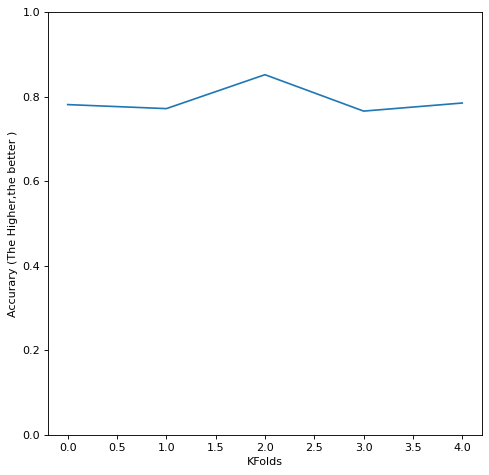

In [12]:
print("%0.2f accuracy, with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
fig, ax = plt.subplots(figsize=(7, 7), dpi=80)
plt.ylim(0,1)
plt.plot(range(folds), scores)
ax.set_xlabel('KFolds')
ax.set_ylabel('Accurary (The Higher,the better )')
plt.show()